# 11: 位相推定問題

In [1]:
from renom_q import *
import math

位相推定問題とは、ユニタリ変換が与えられた時に、そのユニタリ変換の位相$\theta$を推定することである。あるユニタリ変換Uが与えられた時、そのユニタリ変換の固有ベクトル$\left| u \right\rangle$で、その固有値が$\lambda = e^{i\theta} = e^{2\pi i \phi}$であると、次のような関係式となる。
$$U\left| u \right\rangle = \lambda\left| u \right\rangle= e^{i\theta}\left| u \right\rangle = e^{2\pi i \phi}\left| u \right\rangle = e^{2\pi i 0.a_1 a_2 a_3 \dots}\left| u \right\rangle$$

ここで、ユニタリ変換Uの位相$\theta= 2\pi \phi$で、$\phi$は整数でなく、次のような1より以下の小数点となる。
$$0 \leq 2 \pi \phi < 2 \pi \rightarrow 0 \leq \phi < 1$$ 

そこで、小数点を量子ビットを測定してバイナリ値から推定するため、制御Uゲートを用いる。
$$\left| 0 \right\rangle \left| u \right\rangle \xrightarrow{H \otimes I} (\left| 0 \right\rangle + \left| 1 \right\rangle) \left| u \right\rangle \xrightarrow{cU} \left| 0 \right\rangle \left| u \right\rangle + \left| 1 \right\rangle U \left| u \right\rangle =  (\left| 0 \right\rangle + e^{2 \pi i \phi} \left| 1 \right\rangle) \left| u \right\rangle $$

この時、固有値$\lambda$は目標ゲートに生成される。これは、固有値の見返り(Kickback)と呼ばれる。

## 11-1: 3量子ビットでの位相推定問題

3つの制御Uゲートを用いて、3量子ビットでの位相推定問題を解く。アダマール変換とユニタリ変換U$^3$=U・U・Uを用いることで計算され、上位3ビットを逆量子フーリエ変換すれば、ユニタリ変換$U\left| u \right\rangle = \lambda\left| u \right\rangle = e^{2\pi i 0.x_1 x_2 x_3}\left| u \right\rangle$の位相数値$\left| x_1 x_2 x_3 \right\rangle$が求まる。

$$\left| 000 \right\rangle \left| u \right\rangle \xrightarrow{H \otimes H \otimes H \otimes I} (\left| 0 \right\rangle + \left| 1 \right\rangle)(\left| 0 \right\rangle + \left| 1 \right\rangle)(\left| 0 \right\rangle + \left| 1 \right\rangle)\left| u \right\rangle \xrightarrow{cU} \xrightarrow{cU^2} \xrightarrow{cU^3} (\left| 0 \right\rangle + (e^{2\pi i \phi})^3 \left| 1 \right\rangle)(\left| 0 \right\rangle + (e^{2\pi i \phi})^2 \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i \phi} \left| 1 \right\rangle)\left| u \right\rangle = (\left| 0 \right\rangle + (e^{2\pi i 0.x_1 x_2 x_3})^3 \left| 1 \right\rangle)(\left| 0 \right\rangle + (e^{2\pi i 0.x_1 x_2 x_3})^2 \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2 x_3} \left| 1 \right\rangle)\left| u \right\rangle = (\left| 0 \right\rangle + e^{2\pi i 0.x_3} \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i 0.x_2 x_3} \left| 1 \right\rangle)(\left| 0 \right\rangle + e^{2\pi i 0.x_1 x_2 x_3} \left| 1 \right\rangle)\left| u \right\rangle  \xrightarrow{QFT^{-1}_8} \left| x_3 \right\rangle \left| x_2 \right\rangle \left| x_1 \right\rangle \left| u \right\rangle $$

推定する位相を$\theta=14\pi/8$とすると、

{'000': 66, '010': 17, '100': 11, '110': 56, '111': 874}


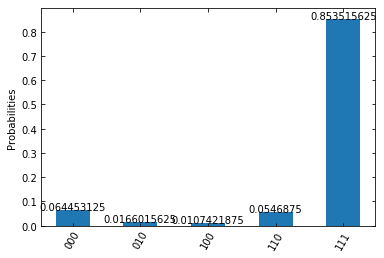

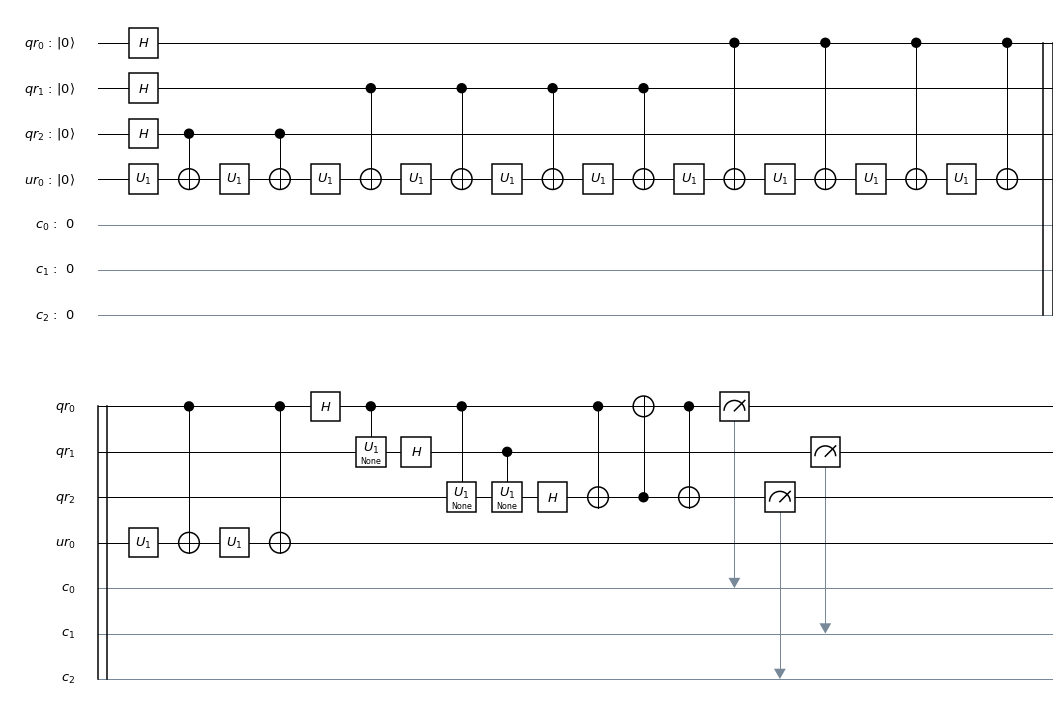

In [2]:
def ctlUn(qci, c, t, p, n):
    for i in range(n):
        qci.u1(-p, t)
        qci.cx(c, t)
        qci.u1(p, t)
        qci.cx(c, t)
        
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-math.pi/float(2**(i-j)),q[j], q[i])
        qci.h(q[i])
        
def swap(qci, s1, s2):
    qci.cx(s1, s2)
    qci.cx(s2, s1)
    qci.cx(s1, s2)
    
n = 3
phase = 14.0*math.pi/8.0
qr = QuantumRegister(n, 'qr')
ur = QuantumRegister(1, 'ur')
c = ClassicalRegister(n)
qc = QuantumCircuit(qr, ur, c)


for i in range(n):
    qc.h(qr[i])

for i in range(n):
    ctlUn(qc, qr[n-1-i], ur[0], phase, i+1)

iqft(qc, qr, n)
swap(qc, qr[0], qr[2])

qc.measure(qr, c)
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)


$\left| 111 \right\rangle$が測定されたので、ユニタリ変換$U\left| u \right\rangle = \lambda\left| u \right\rangle = e^{2\pi i 0.111}\left| u \right\rangle$の位相は、$\theta = 2\pi (1/2 + 1/4 + 1/8)=14\pi /8$となり、始めに設定した推定したい位相と一致する。